In [1]:
import class_function as cf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im_data = pd.read_csv('../Data/result_iv_selected.csv')

In [3]:
im_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(im_data.drop(columns=['TARGET']), im_data.TARGET, test_size=0.2, random_state=0)

SMOTE方法

In [5]:
import imblearn.over_sampling as imbl_os

sm = imbl_os.SMOTE(random_state=0)
x_res, y_res = sm.fit_resample(X_train, Y_train)
x_res = pd.DataFrame(x_res, columns=X_test.columns)
y_res = pd.Series(y_res, name=Y_test.name)

In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_cla = xgb.XGBClassifier(max_depth=10, n_estimators=500, random_state=0, colsample_bylevel = 0.2, n_jobs = 8)

#模型训练
xg_cla.fit(x_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=8, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
Y_predicted = xg_cla.predict(X_test)
print(y_res.unique())
Y_predicted
fbc = cf.For_binary_classifier(Y_predicted, Y_test)

[0 1]
                    Real +          Real -     
   Predict +          236             401      
   Predict -         4619            56247     

准确率： 0.9183779653025056
召回率： 0.048609680741503604
精准率： 0.3704866562009419

漏警率： 0.9513903192584964
虚警率： 0.6295133437990581
F1: 0.08594319009468317
fpr: 0.007078802429035447


In [21]:
y_res.value_counts()

1    226038
0    226038
Name: TARGET, dtype: int64

In [22]:
binary_proba =  xg_cla.predict_proba(X_test)
proba_list = []
for i in range(len(binary_proba)):
    proba_list.append(binary_proba[i][1])

In [23]:
proba_list

[0.2502524,
 0.005540848,
 0.121903,
 0.06627556,
 0.16685767,
 0.13510287,
 0.038337134,
 0.04251471,
 0.0018506673,
 0.044732578,
 0.01411853,
 0.076966204,
 0.021132499,
 0.004406773,
 0.02830314,
 0.0052150595,
 0.020153824,
 0.04689522,
 0.04066614,
 0.005075349,
 0.009045023,
 0.0438987,
 0.003861883,
 0.044772428,
 0.16345297,
 0.024366893,
 0.025802022,
 0.026490211,
 0.0055004973,
 0.016188148,
 0.0053950227,
 0.058061235,
 0.07402322,
 0.21371439,
 0.021239674,
 0.10387202,
 0.006656437,
 0.060837068,
 0.04841082,
 0.05004381,
 0.019620087,
 0.12668711,
 0.22334258,
 0.023294246,
 0.025004024,
 0.057960875,
 0.08896272,
 0.028870132,
 0.041784655,
 0.021754742,
 0.1837195,
 0.018754018,
 0.046760567,
 0.0039490233,
 0.05078477,
 0.10760085,
 0.1311067,
 0.02069066,
 0.0067885136,
 0.13348751,
 0.058128353,
 0.07535683,
 0.0042565893,
 0.022429451,
 0.117551625,
 0.035391144,
 0.034888867,
 0.025862673,
 0.014602689,
 0.06881489,
 0.045025956,
 0.09206783,
 0.14933804,
 0.0469

In [24]:
threshold_list = np.arange(0, 1, 0.01)
accuracy_list = []
recall_list = []
precision_list = []
MissingAlarm_list = []
FalseAlarm_list = []
F1_list = []
fpr_list = []

for threshold in threshold_list:
    #y_predicted = multi_xgb.predict(x_test, threshold)
    y_predicted = []
    
    for proba in proba_list:
        if proba > threshold:
            y_predicted.append(1)
        else:
            y_predicted.append(0)
            
    fbc = cf.For_binary_classifier(y_predicted, Y_test)
    accuracy_list.append(fbc.accuracy)
    recall_list.append(fbc.recall)
    precision_list.append(fbc.precision)
    MissingAlarm_list.append(fbc.MissingAlarm)
    FalseAlarm_list.append(fbc.FalseAlarm)
    F1_list.append(fbc.F1)
    fpr_list.append(fbc.fpr)
    print('*' * 40)
    

                    Real +          Real -     
   Predict +         4855            56648     
   Predict -           0               0       

准确率： 0.0789392387363218
召回率： 1.0
精准率： 0.0789392387363218

漏警率： 0.0
虚警率： 0.9210607612636782
F1: 0.1463274963079056
fpr: 1.0
****************************************
                    Real +          Real -     
   Predict +         4611            44485     
   Predict -          244            12163     

准确率： 0.2727346633497553
召回率： 0.9497425334706489
精准率： 0.09391803812937917

漏警率： 0.05025746652935115
虚警率： 0.9060819618706208
F1: 0.1709328835424737
fpr: 0.78528809490185
****************************************
                    Real +          Real -     
   Predict +         4308            34800     
   Predict -          547            21848     

准确率： 0.42528006763897697
召回率： 0.8873326467559217
精准率： 0.11015648972077324

漏警率： 0.11266735324407828
虚警率： 0.8898435102792268
F1: 0.19598298569251418
fpr: 0.6143200112978393
********************

                    Real +          Real -     
   Predict +         1071            2860      
   Predict -         3784            53788     

准确率： 0.8919727492967823
召回率： 0.22059732234809476
精准率： 0.27244975833121343

漏警率： 0.7794026776519052
虚警率： 0.7275502416687866
F1: 0.24379694969269294
fpr: 0.050487219319305186
****************************************
                    Real +          Real -     
   Predict +         1003            2644      
   Predict -         3852            54004     

准确率： 0.8943791359771068
召回率： 0.20659114315139032
精准率： 0.2750205648478201

漏警率： 0.7934088568486097
虚警率： 0.7249794351521799
F1: 0.23594448365090567
fpr: 0.04667419855952549
****************************************
                    Real +          Real -     
   Predict +          939            2443      
   Predict -         3916            54205     

准确率： 0.8966066695933532
召回率： 0.19340885684860967
精准率： 0.2776463630987581

漏警率： 0.8065911431513904
虚警率： 0.7223536369012419
F1: 0.22799562947

                    Real +          Real -     
   Predict +          287             496      
   Predict -         4568            56152     

准确率： 0.9176625530461928
召回率： 0.059114315139031925
精准率： 0.3665389527458493

漏警率： 0.9408856848609681
虚警率： 0.6334610472541506
F1: 0.10180915218162469
fpr: 0.008755825448382997
****************************************
                    Real +          Real -     
   Predict +          272             462      
   Predict -         4583            56186     

准确率： 0.9179714810659643
召回率： 0.05602471678681771
精准率： 0.37057220708446864

漏警率： 0.9439752832131822
虚警率： 0.6294277929155314
F1: 0.09733404902487028
fpr: 0.008155627736195452
****************************************
                    Real +          Real -     
   Predict +          254             426      
   Predict -         4601            56222     

准确率： 0.918264149716274
召回率： 0.05231719876416066
精准率： 0.3735294117647059

漏警率： 0.9476828012358394
虚警率： 0.6264705882352941
F1: 0.0917795844

                    Real +          Real -     
   Predict +          53              77       
   Predict -         4802            56571     

准确率： 0.9206705363965986
召回率： 0.010916580844490216
精准率： 0.4076923076923077

漏警率： 0.9890834191555098
虚警率： 0.5923076923076923
F1: 0.021263791374122366
fpr: 0.0013592712893659088
****************************************
                    Real +          Real -     
   Predict +          51              73       
   Predict -         4804            56575     

准确率： 0.9207030551355219
召回率： 0.010504634397528322
精准率： 0.4112903225806452

漏警率： 0.9894953656024716
虚警率： 0.5887096774193548
F1: 0.020486041373769835
fpr: 0.001288659793814433
****************************************
                    Real +          Real -     
   Predict +          45              64       
   Predict -         4810            56584     

准确率： 0.9207518332439067
召回率： 0.009268795056642637
精准率： 0.41284403669724773

漏警率： 0.9907312049433573
虚警率： 0.5871559633027523
F1: 0.0181

                    Real +          Real -     
   Predict +           0               1       
   Predict -         4855            56647     

准确率： 0.9210445018942165
召回率： 0.0
精准率： 0.0

漏警率： 1.0
虚警率： 1.0
F1: 0
fpr: 1.7652873887868946e-05
****************************************
                    Real +          Real -     
   Predict +           0               1       
   Predict -         4855            56647     

准确率： 0.9210445018942165
召回率： 0.0
精准率： 0.0

漏警率： 1.0
虚警率： 1.0
F1: 0
fpr: 1.7652873887868946e-05
****************************************
                    Real +          Real -     
   Predict +           0               1       
   Predict -         4855            56647     

准确率： 0.9210445018942165
召回率： 0.0
精准率： 0.0

漏警率： 1.0
虚警率： 1.0
F1: 0
fpr: 1.7652873887868946e-05
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         4855            56648     

准确率： 0.92106

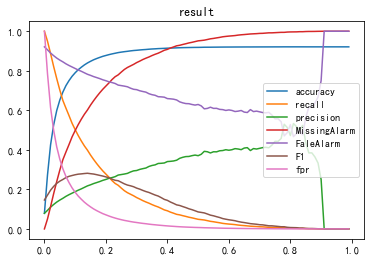

In [35]:
x_list = np.arange(0, 1, 0.01)
plt.title('result')
plt.plot(x_list, accuracy_list, label='accuracy')
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, precision_list, label='precision')
plt.plot(x_list, MissingAlarm_list, label='MissingAlarm')
plt.plot(x_list, FalseAlarm_list, label='FaleAlarm')
plt.plot(x_list, F1_list, label='F1')
plt.plot(x_list, fpr_list, label='fpr')
plt.legend()
plt.show()

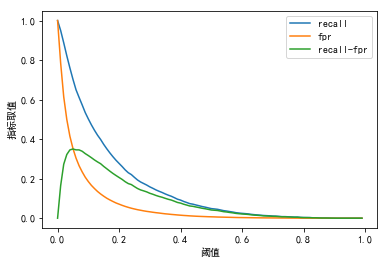

In [36]:
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, fpr_list, label='fpr')
plt.plot(x_list, [recall_list[i] - fpr_list[i] for i in range(len(recall_list))], label='recall-fpr')
plt.legend()
plt.xlabel('阈值')
plt.ylabel('指标取值')
plt.show()

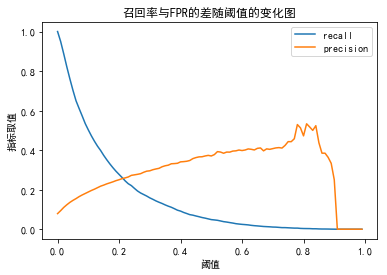

In [37]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, precision_list, label='precision')
plt.legend()
plt.xlabel('阈值')
plt.ylabel('指标取值')
plt.title('召回率与FPR的差随阈值的变化图')
plt.show()

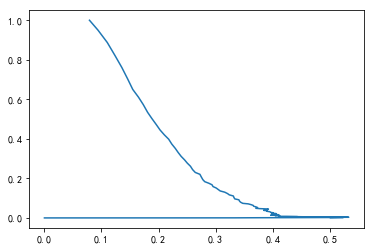

In [28]:
plt.plot(precision_list, recall_list, label='precision')
plt.show()

In [33]:
tpr_min_fpr = [recall_list[i] - fpr_list[i] for i in range(len(recall_list))]
ks = max(tpr_min_fpr)
ks

0.350176274217525

In [34]:
K_S = max([recall_list[i] - fpr_list[i] for i in range(len(recall_list))])
print(K_S)
np.argmax([recall_list[i] - fpr_list[i] for i in range(len(recall_list))])

0.350176274217525


5

In [32]:
accuracy_list[5]

0.651594231175715